## Time Series Analysis

After python simulation outputs files to a data directory. These R scripts are used to analyze the simulation as if we collected a virtual time series from a single point in x,z space, a virtual mooring. The plots below look at a simulation specified by a data directory. They then look at two points ( at the same depth ) and plot a comparative time series.  

In [1]:
source('src/timeseries_analysis.r')
x1=20
x2=60
z =10

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


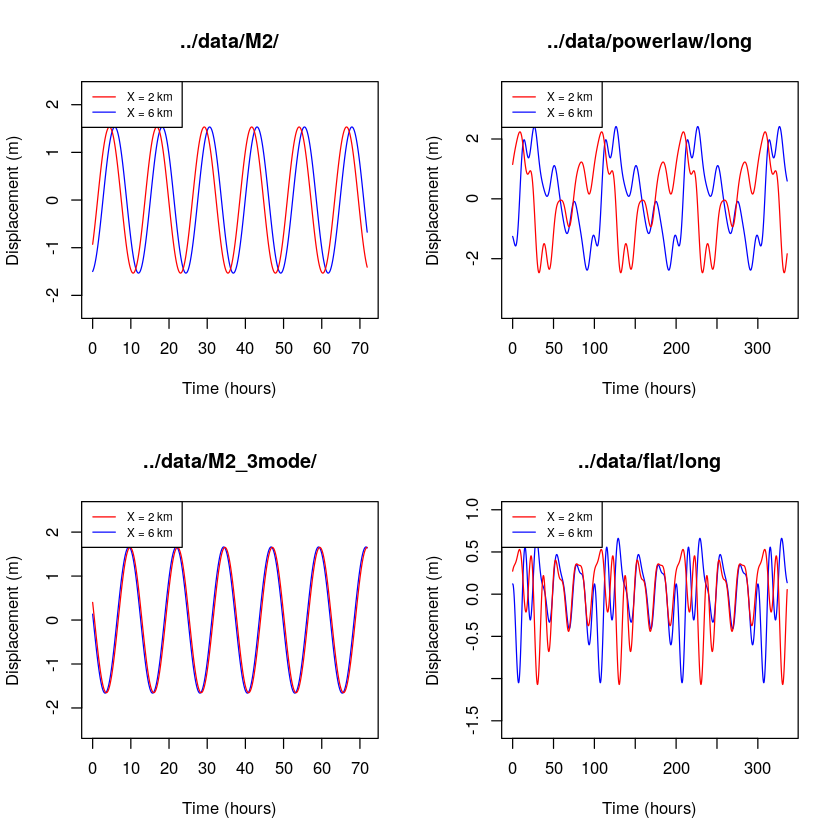

In [2]:
par(mfrow=c(2,2))
ts_compare_plot("../data/M2/",z,x1,x2)
ts_compare_plot("../data/powerlaw/long",z,x1,x2)
ts_compare_plot("../data/M2_3mode/",z,x1,x2)
ts_compare_plot("../data/flat/long",z,x1,x2)

## Cross-correlation
Below are plots of the cross-correlation between the two time series for each type of simulation. This demostrates the correlation between different IW distributions in the ocean. The cross-correlation function is defined below for two time series X and Y.
$$\rho_{XY}  = \frac{ \langle (X_t - \mu_x)( Y_{t+\tau} - \mu_Y ) \rangle}{\sigma_x \sigma_y}$$ 

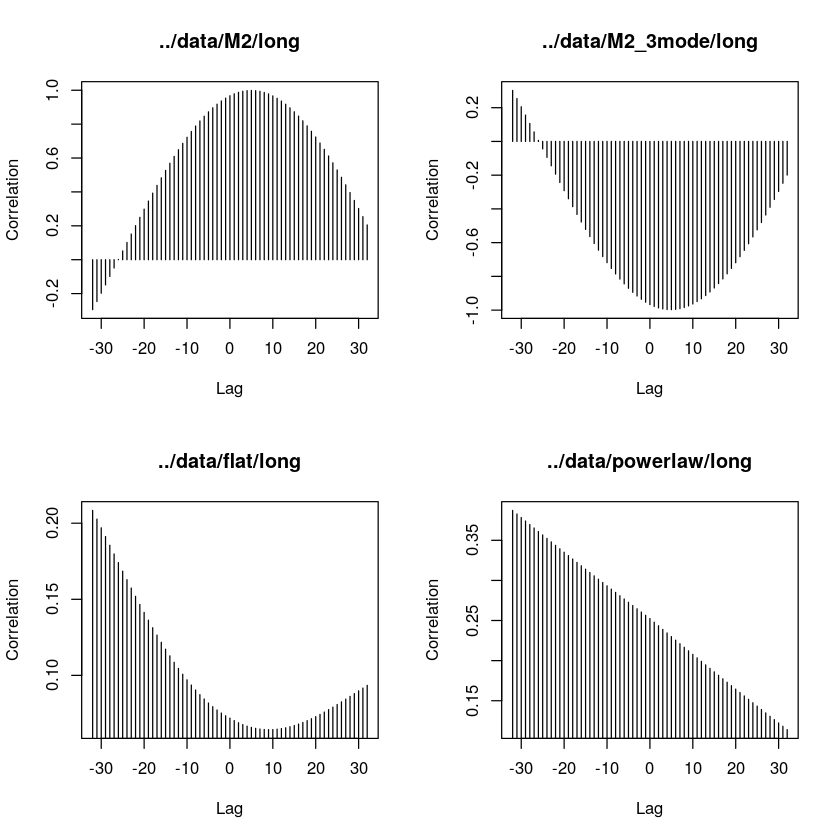

In [335]:

par(mfrow=c(2,2))
crosscor("../data/M2/long",z,x1,x2)
crosscor("../data/M2_3mode/long",z,x1,x2)
crosscor("../data/flat/long",z,x1,x2)
crosscor("../data/powerlaw/long",z,x1,x2)




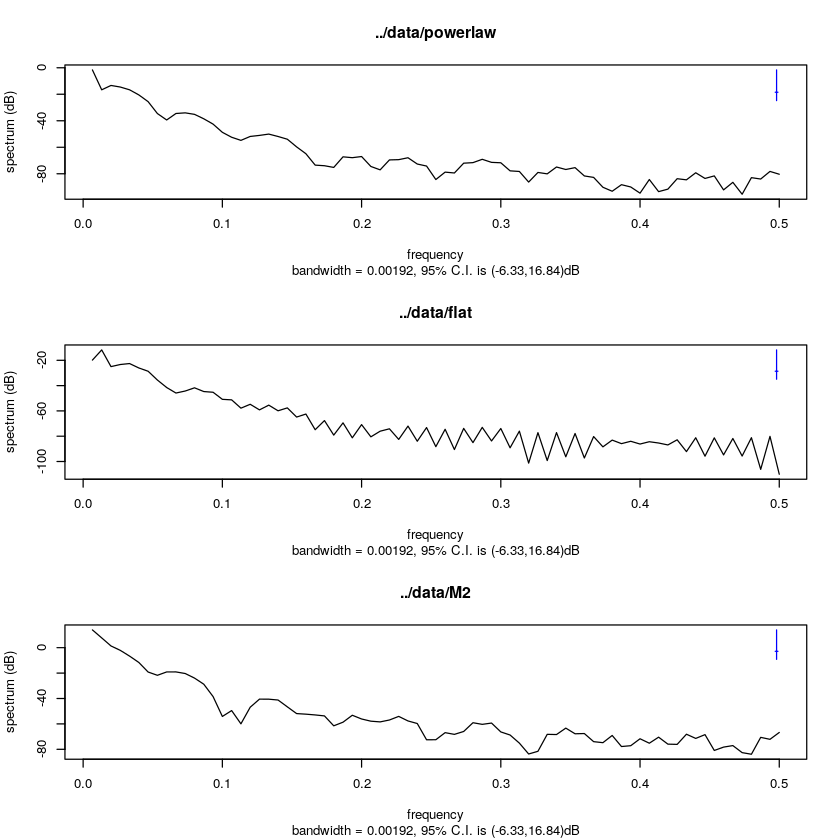

In [336]:
par(mfrow=c(3,1))
for (type in list('../data/powerlaw','../data/flat',"../data/M2")){
   ts1  = time_series(type,z,x1)
   ts2  = time_series(type,z,x2)
   rho  = ccf(ts1$disp,ts2$disp,length(ts1$disp)/10,plot=FALSE)
   spectrum(rho$acf,main=type,log="dB")
}